# Breast Cancer prediction machine learning algorithm using logistic regression


The data was obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
Data description can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

Objective 
---------

Predict breast cancer based on a set of cytology features (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nuceloli, mitosis).


In [1]:
import pandas as pd

In [2]:
# Read breast cancer csv file to pandas data frame data
data = pd.read_csv('wisconsin_breast_cancer.csv')

In [3]:
# Display the first 5 rows of the csv file
data.head()

id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   
2  1015425          3     1      1         1       2     2.0          3   
3  1016277          6     8      8         1       3     4.0          3   
4  1017023          4     1      1         3       2     1.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0  
2         1        1      0  
3         7        1      0  
4         1        1      0

In [4]:
data.shape # It is always a good idea to understand your data

(699, 11)

# Delete rows with missing data

In [8]:
data.isnull().sum() # Find out how many cells have missing values
# Looks like the field nucleoli has 16 missing values 

id           0
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64

In [9]:
data=data.dropna(how='any') # Dropping any rows that has missing values

In [10]:
print(data.shape)
# previously we had 699 rows. The above code deleted 16 rows with missing values and now we have 683 rows

(683, 11)


In [11]:
#creating feature data set
# Here we are going to select feature fileds and assign it to a pandas data frame x. We do not need Id. So it was dropped
x=data[['thickness','size','shape','adhesion','single','nuclei','chromatin','nucleoli','mitosis']] 
#EXPLORE WITH ONLY DROP FUNCTION

In [12]:
x.head() # printing the first 5 rows to see whether we got all the features 

thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0          5     1      1         1       2     1.0          3         1   
1          5     4      4         5       7    10.0          3         2   
2          3     1      1         1       2     2.0          3         1   
3          6     8      8         1       3     4.0          3         7   
4          4     1      1         3       2     1.0          3         1   

   mitosis  
0        1  
1        1  
2        1  
3        1  
4        1

In [13]:
# Now we are going to extract the 'class' field from 'data' and store it in variable y
# This is the variable that we want to predict 0= no cancer 1 = cancer 
y=data['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Getting ready to do classification

Import cross validation from sklearn for test trian split. 
Then import logistic regression from sklearn.


The goal is to spilit our data into two. A traning data set and a testing set. 
We will use the training set to train our logistic regression model. 
After that, we will use this model to predict cancer occurance from the features in the testing set. 
Since we already know the occurance of cancer in the testing set we can comapre it with the predicted vaules to benchmark our model. 


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [15]:
# train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)    

/home/sounak97/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred_class=logreg.predict(x_test) # make predictions based on x_test and store it to y_pred_class

In [17]:
# Now let us see how our model is performing. 
# We will start with accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9298245614035088


In [ ]:
## Not bad at all. 92.9% of the time our model was able to identify breast cancer based on the training data 
# Now let us see how our "intelligent" model compare to a dumb model which predicts "o" or "not cancer" all the time
# because it the most prevelent class

In [18]:
y_test.value_counts() # as you see "0" is more prevalent 

0    107
1     64
Name: class, dtype: int64

# Now let us create a confusion matrix to identify sensitivity specificity & all  the other good statistical stuff

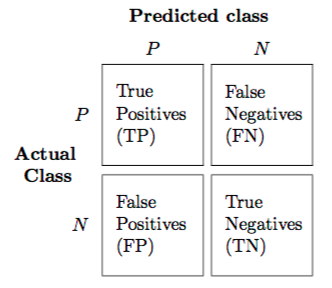

In [20]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[103   4]
 [  8  56]]


In [21]:
#  let us see what this means
#
#                Predicted 0    Predicted 1    Total
#                                
#Actual  0        103              4            107
#Actual  1          8             56             64           
#Total            111             60 

In [22]:
confusion =metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [23]:
# Let us see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.875


In [24]:
# Our model's sensitivity is 87.5%

In [25]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.9626168224299065


In [26]:
# precison - when it is predicting cancer how precise is it 
# positive predictive value 
print (TP / float(TP+FP))

0.9333333333333333


In [27]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9279279279279279


In [28]:
#EXPLORE 'accuracy' and 'recall'
logreg.predict(x_test)[0:10] # predicting cancer  based on the data from first 10 rows of x


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [29]:
# Now let us predict the probaility of each prediction
logreg.predict_proba(x_test)[0:10, :]

array([[0.92925368, 0.07074632],
       [0.97810202, 0.02189798],
       [0.05497954, 0.94502046],
       [0.01971146, 0.98028854],
       [0.98442876, 0.01557124],
       [0.96262046, 0.03737954],
       [0.94219509, 0.05780491],
       [0.00202679, 0.99797321],
       [0.9598277 , 0.0401723 ],
       [0.98330704, 0.01669296]])

In [ ]:
# The first column is the probability of it being benign. Second column is the probablity of it being cancerous 